# Twitter dataset analysis with Infomap

## Run pipelines

In [1]:
# IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import matplotlib.pyplot as plt
import seaborn as sns
from orchestrator import Orchestrator
from analysis_helper import AnalysisHelper

INFO - datasources.tw.tw - load config file
INFO - datasources.tw.proxy_provider - getting proxy list
INFO - datasources.tw.proxy_provider - reading proxy list json file
DEBUG - datasources.tw.tw_api - INIT Tw api
DEBUG - datasources.tw.tw_premium_api - INIT Tw premium api
INFO - datasources.tw.tw - INIT Tw
DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# LOGGING LEVEL
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [3]:
# PATHS
PROJECT_PATH = os.path.abspath('')
INPUT_PATH = os.path.join(PROJECT_PATH, 'input/')
OUTPUT_PATH = os.path.join(PROJECT_PATH, 'output/')
PROJECT_NAME = 'uk_healthcare_infomap_small'

In [4]:
# PIPELINE
o = Orchestrator(PROJECT_NAME, INPUT_PATH, OUTPUT_PATH)
o.execute()
ah = AnalysisHelper(o.datasources)

## Analysis

### Context and graph analysis


#### Context summary

In [5]:
display(ah.get_contexts())

,start_date,end_date,location,hashtags
name,,,,
16-days-of-action-2018,2018-11-25,2018-12-10,United Kingdom,#16days #16daysofaction #16daysofactiontoolkit
elf-day,2018-12-03,2018-12-12,United Kingdom,#elfday #elfday2018


#### Context's graphs

In [6]:
graphs = ah.get_graphs()
display(graphs.describe())
display(graphs)

,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity,scc_over_nodes
count,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,380.50000,392.50000,2.076000,2.204000,0.002500,375.500000,0.05500,-0.157000,0.986500
std,21.92031,61.51829,0.442649,0.417193,0.000707,26.162951,0.06364,0.035355,0.012021
min,365.00000,349.00000,1.763000,1.909000,0.002000,357.000000,0.01000,-0.182000,0.978000
25%,372.75000,370.75000,1.919500,2.056500,0.002250,366.250000,0.03250,-0.169500,0.982250
50%,380.50000,392.50000,2.076000,2.204000,0.002500,375.500000,0.05500,-0.157000,0.986500
75%,388.25000,414.25000,2.232500,2.351500,0.002750,384.750000,0.07750,-0.144500,0.990750
max,396.00000,436.00000,2.389000,2.499000,0.003000,394.000000,0.10000,-0.132000,0.995000


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity,scc_over_nodes
name,,,,,,,,,,
16-days-of-action-2018,396,349,1.763,1.909,0.002,False,394.0,0.01,-0.132,0.995
elf-day,365,436,2.389,2.499,0.003,False,357.0,0.10,-0.182,0.978


* *# nodes*: number of users.
* *# edges*: number of relations between users.
* *avg degree*: average number of edges per node.
* *avg degree*: average weigth sum per node.
* *density*: expresses the how sparse is the adjacency matrix (i.e. how likely that a node has edges). 0 for a graph without edges and 1 for a complete graph.

\begin{align}
&\begin{aligned}
d = \frac{m}{n(n-1)}
\end{aligned}\\
&\begin{aligned}
m = \text{# edges}
\end{aligned}\\
&\begin{aligned}
n = \text{# nodes}
\end{aligned}
\end{align}

* *connected*: for each pairs of nodes exists a path that connects them.
* *strongly connected components*: group of nodes for which for each pair of nodes exists a path that connects them. Can be broadly relatable to the concept of community.
* *avg clustering*: average for each node of the fraction of possible triangles through that node that exist.
* *assortativity*: measures how much nodes are likely to connect to nodes with the same degree (>0) or with a different degree (<0).

### Community Detection analysis

#### Partitions summary

In [7]:
for context_name, partition in ah.get_partitions():
    print(f'context "{context_name}":')
    display(partition)
    display(partition.describe())

context "16-days-of-action-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,14,16,2.2857,2.2857,0.0879,True,14,0.0000,-0.5494
1,12,23,3.8333,4.8333,0.1742,True,12,0.0000,-0.1245
2,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
3,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
4,25,37,2.9600,3.2000,0.0617,True,25,0.0000,-0.4423
5,15,14,1.8667,1.8667,0.0667,True,15,0.0000,NaN
6,4,4,2.0000,3.5000,0.3333,True,4,0.0000,NaN
7,10,9,1.8000,1.8000,0.1000,True,10,0.0000,NaN
8,8,8,2.0000,2.0000,0.1429,True,8,0.0000,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,6.000000
mean,7.206897,7.724138,1.992683,2.262697,0.211152,7.172414,0.014369,-0.439417
std,4.616580,7.170856,0.527777,0.730910,0.101574,4.598672,0.077379,0.318518
min,4.000000,3.000000,1.500000,1.500000,0.061700,4.000000,0.000000,-1.000000
25%,4.000000,4.000000,1.600000,1.777800,0.142900,4.000000,0.000000,-0.522625
50%,5.000000,6.000000,1.866700,2.000000,0.200000,5.000000,0.000000,-0.397950
75%,8.000000,8.000000,2.000000,2.500000,0.250000,8.000000,0.000000,-0.213425
max,25.000000,37.000000,3.833300,4.833300,0.500000,25.000000,0.416700,-0.124500


context "elf-day":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,17,24,2.8235,2.9412,0.0882,True,15,0.1213,-0.7309
1,27,74,5.4815,5.4815,0.1054,True,27,0.3020,-0.1155
2,30,38,2.5333,2.8000,0.0437,True,27,0.2233,-0.7593
3,5,4,1.6000,1.6000,0.2000,True,5,0.0000,NaN
4,5,4,1.6000,3.2000,0.2000,True,5,0.0000,-0.5774
5,4,3,1.5000,1.5000,0.2500,True,4,0.0000,NaN
6,10,12,2.4000,2.4000,0.1333,True,9,0.2445,-0.4082
7,5,4,1.6000,1.6000,0.2000,True,5,0.0000,-0.5774
8,8,9,2.2500,2.2500,0.1607,True,8,0.1458,-0.6248


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,14.000000
mean,7.862069,9.965517,2.081186,2.149614,0.217762,7.620690,0.077917,-0.509821
std,7.351988,14.811874,0.973151,0.998248,0.091767,6.961187,0.144890,0.175608
min,4.000000,3.000000,1.500000,1.500000,0.038500,4.000000,0.000000,-0.759300
25%,4.000000,3.000000,1.500000,1.500000,0.166700,4.000000,0.000000,-0.577400
50%,5.000000,4.000000,1.600000,1.666700,0.250000,5.000000,0.000000,-0.577400
75%,7.000000,9.000000,2.250000,2.400000,0.250000,7.000000,0.121300,-0.431150
max,30.000000,74.000000,5.481500,5.481500,0.466700,27.000000,0.531000,-0.115500


For each context provide all the communities and the related metrics.

**important**: if the community detection algorithm fails to provide a community, the whole network is considered as a single community.

In [8]:
ah.get_partitions_aggregated()

,count,max,mean,min,std
name,,,,,
assortativity,10.0,-0.12,-0.47,-1.00,0.25
avg_clustering,29.0,0.53,0.05,0.00,0.11
avg_degree,29.0,5.48,2.04,1.50,0.75
avg_weighted_degree,29.0,5.48,2.21,1.50,0.86
density,29.0,0.50,0.21,0.04,0.10
no_edges,29.0,74.00,8.84,3.00,10.99
no_nodes,29.0,30.00,7.53,4.00,5.98
strongly_conn_components,29.0,27.00,7.40,4.00,5.78


Aggregation of the partition metrics presented above.

The average number of communities is given by the count column (ignore the assortativity cell, NaN do alterate the mean).

In [9]:
community_over_nodes_ratio = ah.community_over_nodes_ratio()
display(community_over_nodes_ratio)
display(community_over_nodes_ratio.describe().round(decimals=2))

,community/no_nodes ratio
name,
16-days-of-action-2018,0.14
elf-day,0.13


,community/no_nodes ratio
count,2.00
mean,0.14
std,0.01
min,0.13
25%,0.13
50%,0.14
75%,0.14
max,0.14


For each context determine the ratio of found communities over the number of nodes chosen to be part of a community.

#### Partition quality metrics

In [10]:
for context_name, pquality in ah.get_pquality():
    print(f'context "{context_name}":')
    display(pquality)

context "16-days-of-action-2018":


,min,max,avg,std
index,,,,
internal_density,0.030833,0.250000,0.105576,0.049910
edges_inside,3.000000,37.000000,7.724138,7.046136
normalized_cut,0.000000,0.113328,0.015863,0.035748
avg_degree,1.500000,3.833333,1.992682,0.518605
fomd,0.000000,0.500000,0.190142,0.150454
expansion,0.000000,0.250000,0.030022,0.068706
cut_ratio,0.000000,0.001220,0.000148,0.000337
conductance,0.000000,0.111111,0.015479,0.034931
max_odf,0.000000,2.000000,0.344828,0.543035


context "elf-day":


,min,max,avg,std
index,,,,
internal_density,0.019231,0.233333,0.108881,0.045087
edges_inside,3.000000,74.000000,9.965517,14.554257
normalized_cut,0.000000,0.437946,0.082049,0.118848
avg_degree,1.500000,5.481482,2.081182,0.956222
fomd,0.038462,0.500000,0.308601,0.129298
expansion,0.000000,1.200000,0.208169,0.322680
cut_ratio,0.000000,0.005381,0.000935,0.001448
conductance,0.000000,0.428571,0.080302,0.116491
max_odf,0.000000,31.000000,1.551724,5.593014


Survey of community measures: https://github.com/Lab41/survey-community-detection 
* *Internal density*: number of edges (ms) in subset S divided by the total number of possible edges between all nodes (ns(ns-1)/2). Higher the better
* *Average degree*: average internal degree across all nodes (ns) in subset S. Higher the better.
* *FOMD (Fraction over median degree)*: Determines the number of nodes that have an internal degree greater than the median degree of nodes in Subset S. Higher the better.
* *Expansion*: can be thought as “External Degree”. Measure of separability. Lower the better.
* *Cut Ratio*: This metric is a measure of separability and can be thought of as "External Density". Lower the better.
* *Conductance*: Ratio of edges inside the cluster to the number of edges leaving the cluster (captures surface area to volume). Higher the better.
* *Normalized Cut*: Represents how well subset S is separated from graph G. Combines Conductance with the fraction of external edges over all non-community edges. Higher the better.
* *Maximum ODF (Out Degree Fraction)*: Fraction of external conections to internal connections for each node (ns) in S. It then returns the fraction with the highest value. Lower the better.
* *Average ODF*: same as Maximum ODF but takes the average. Lower the better.
* *Flake-ODF*: Fraction of the number of nodes that have fewer internal connections than external connections to the number of nodes (ns) in subset S. Higher the better.

#### Cumulative sum of degree distribution

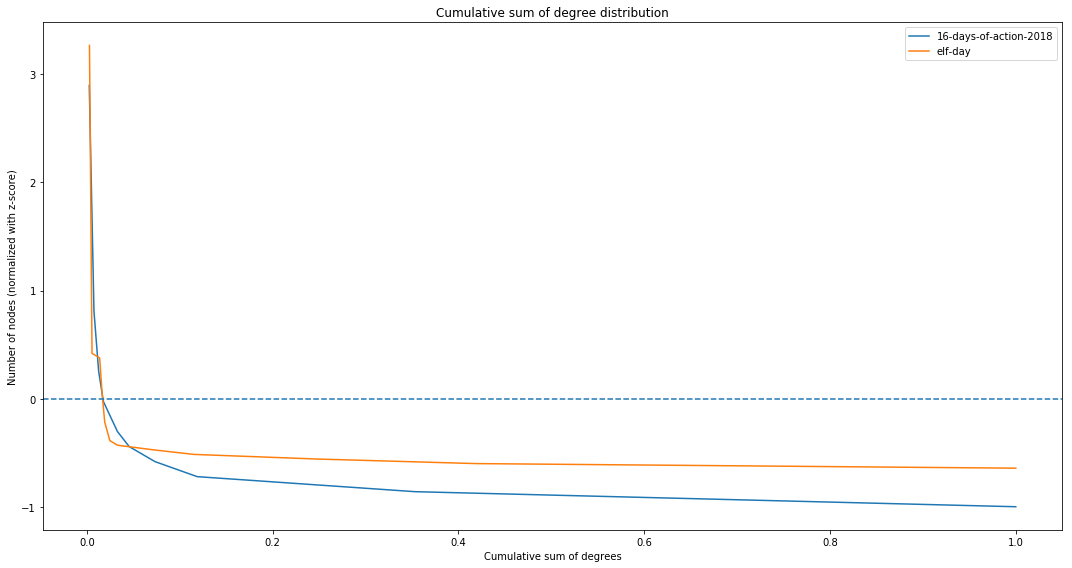

In [20]:
ah.plot_cumsum_deg_dist();

Cumulative sum of degree distribution shows how the degree is distributed with respect to the number of nodes.

* Nodes with a lower degree (left on the plot) are typically way more than the ones with a high degree (right on the plot).

* Over the dotted line there's a number of node above the mean (the converse below the line) as per z-score.

* Z-score normalization for the number of nodes has been chosen because it preserves the range (maximum and minimum) and introduces the dispersion of the serie (standard deviation / variance)

\begin{align}
P(k) = \frac{\text{# nodes with degree >= k}}{\text{# nodes}}
\end{align}

Cumulative sum of degree distribution is more robust wrt the simple degree distribution because is less subject to small numbers. 

#### Summary stats for communities

In [22]:
ah.partition_stats()

,values
degenerated_context_ratio,0.0
good_context_ratio,1.0
avg_communities_per_good_context,29.0
avg_sociable_users_ratio,1.0


Measures to detect the goodness of partitions from :
* *Degenerated context ratio*:
\begin{align}
\text{degenerated_context_ratio} = \frac{\text{# degenerated contexts}}{\text{# contexts}}
\end{align}
* *Good context ratio*: which is the reverse of the degenerated context ratio.
\begin{align}
\text{good_context_ratio} = \frac{\text{# good contexts}}{\text{# contexts}}
\end{align}
* *Average communities per context*: the average number of communities for number of contexts. Only considers good contexts.
\begin{align}
\text{avg_communities_per_good_context	} = \frac{\sum{\text{# good communities}}}{\text{# good contexts}}
\end{align}
* *Average sociable users ratio*: the average for the context number for the ratio of the users in the communities over the users found. Only considers good contexts.
\begin{align}
\text{avg_communities_per_good_context	} =
\frac{\sum{\frac{\text{# users in communities in context}}{\text{# all users in context}}}}
{\text{# good contexts}}
\end{align}

*note*: a "degenerated context" is a context for which the community detection algorithm hasn't found any community. Degenerated context provide then a unique great community which includes all the nodes of the network graph. A "good context" is the reverse: all the contexts for which the community detection algorithm has found at least a communtiy.

## Shared users analysis

#### Shared users and community detection

In [27]:
shared_nodes = ah.compare_common_nodes()
display(shared_nodes.is_present.value_counts())
display(shared_nodes)

Empty DataFrame
Columns: [no_participations]
Index: []


Series([], Name: is_present, dtype: int64)

,no_participations,is_present


Community detection process filters out users not belonging to any community.

In this table are listed all the users from all the contexts that belongs to more than one context. 

* *is_present* column: describes whether a user has survived the community detection process.
* *no_participations* column: counts how many contexts a user has been in.

**important**: no_participations below may differ for the fact that a user may have survived in a context but not other ones.

#### Shared users

In [28]:
shared_nodes = ah.get_common_nodes()
print(f'There are {len(shared_nodes.index)} shared nodes.')
display(shared_nodes.groupby('no_participations').count().name.to_frame().rename(columns={'name': 'count'}))
display(shared_nodes.sort_values(by=['no_participations', 'follower_rank'], ascending=False).round(decimals=2))

There are 0 shared nodes.


,count
no_participations,


,name,url,location,bio,likes,follower_rank,no_participations
user_name,,,,,,,


Number of appearances of nodes across different events togheter with Tw infos.

#### Shared users and events

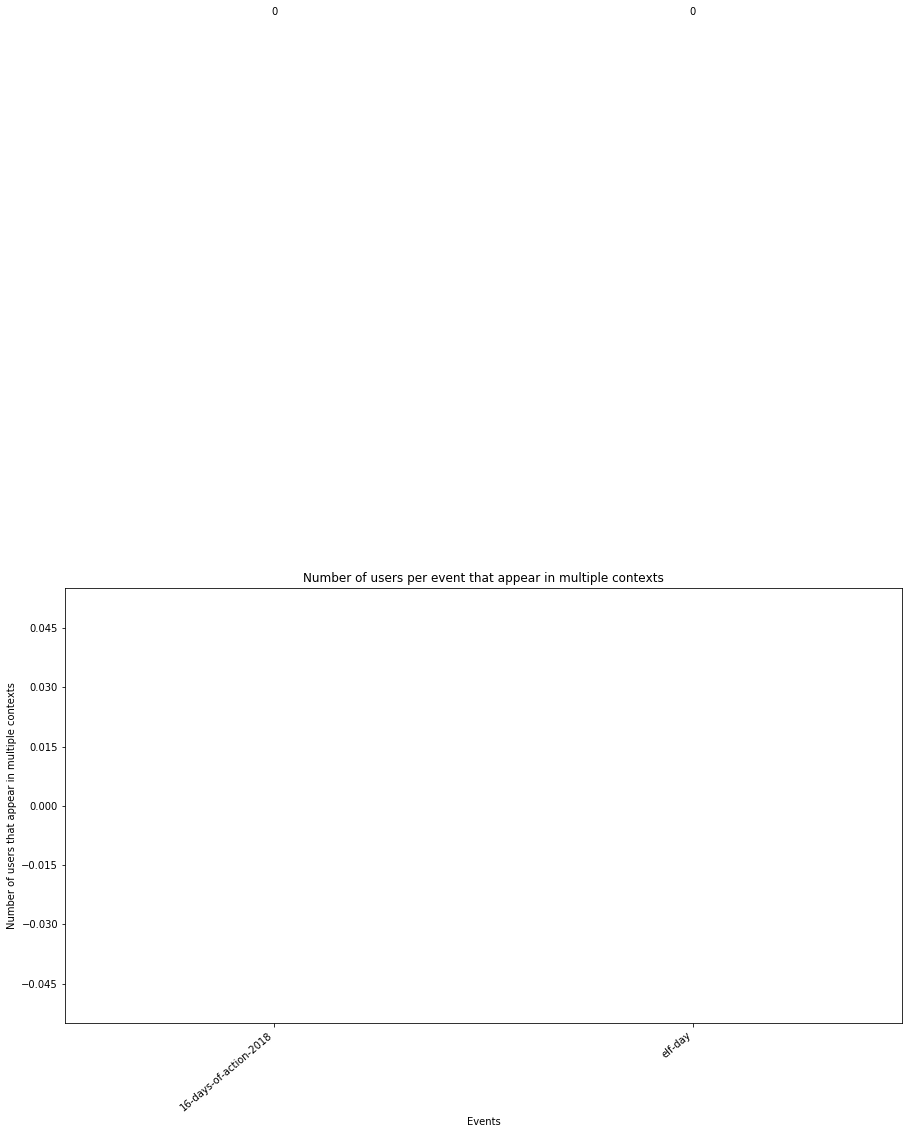

In [34]:
ah.plot_contexts_with_common_nodes();

Number of users per event that appear in more than one event.

## Ranking

In [35]:
ah.rank_1().head(10)

,user_name,name,location,rank
0,_globalbeauty,Global Beauty,United States,46.0
1,kingstrokesxxx,KingStrokes,Birmingham UK,46.0
2,edp24,Eastern Daily Press,"Norfolk, UK",34.5
3,eveningnews,Norwich Evening News,"Norwich, England",34.5
4,caronadune,caroline couronne,None,31.0
5,diophenriette,Henrزette,Trenchtown,31.0
6,fatherbob,FatherBob,"South Melbourne, Australia",31.0
7,gcobber99,Geoff Pearson,Bendigo,31.0
8,glennfdavies,Glenn Davies,"Melbourne, Victoria, Aust",31.0
9,in_pjsdwnstairs,Alanna Banana,"Chapel Hill, NC",31.0


Ranking function that takes into account:
* *Inverse in-degree*: In the considered graphs the hubs in the communities seems to be mostly related to associations and organizations. The smaller ones are more likely to be individuals.
* *Topical focus*: related to the interest the users have on the topic.

Formula:
\begin{align}
\mathit{R1}(u) & = \frac{1}{\sum_{u \in C} \mathit{IC}(u) + 1} \cdot \sum_{u \in C} \mathit{TF}(u)
\end{align}

In [41]:
ah.rank_2().head(10)

,rank
user_name,
lexieisfree,0.761802
jo_millar27,0.753028
topisue56,0.682091
socialissp,0.584045
barryoor,0.567857
whiteribb,0.558333
jacksju1,0.547059
ringinglowarrow,0.521472
creditonchamber,0.493567


Formula:

\begin{align}
\mathit{R2}(u) & = \lvert \mathit{FR}(u) - 1 \rvert \cdot \left(\sum_{u \in C} \mathit{TA}(U) + \sum_{u \in C} \mathit{IC}(U)\right)
\end{align}

In [42]:
ah.rank_3().head(10)

,rank
user_name,
lexieisfree,1.523603
topisue56,1.364183
solutions777,1.014226
ni9ccbaxqgp1tu1,0.986857
elpolitologo10,0.983511
in_pjsdwnstairs,0.978646
jaybelevee,0.950005
steven05280627,0.946171
katiehampson333,0.944561


Formula:

\begin{align}
\mathit{R3}(u) & = \lvert \mathit{FR}(u) - 1 \rvert \cdot \left(\sum_{u \in C} \mathit{TA}(U) + \frac{1}{\sum_{u \in C} \mathit{IC}(U) + 1}\right)
\end{align}

# Tables for the paper

## Table 1

In [ ]:
table_1 = AnalysisHelper.get_single_summary('event_detection', 'event', results)\
        [['start_date', 'end_date', 'hashtags']].merge(graph_summaries, left_index=True, right_index=True)

table_1.reset_index(inplace=True)

table_1['hashtags'] = table_1['hashtags'].apply(lambda x: x[0].lower() if len(x)>1 else x[0].lower() + ', ...')
table_1['name'] = table_1['name'].apply(lambda x: x.replace('-2018', '').replace('-', ' ').capitalize())
table_1['period (2018)'] = table_1[['start_date', 'end_date']].apply(lambda x: ' / '.join(x).replace('2018-', ''), axis=1)


table_1[['assortativity', 'avg_degree']] = table_1[['assortativity', 'avg_degree']].round(decimals=1)
table_1['density'] = table_1['density'].round(decimals=3)

table_1 = table_1[['name', 'period (2018)', 'no_nodes', 'no_edges', 'density', 'avg_degree', 'assortativity']]

table_1.rename(columns={'name': 'context name',
                        'avg_degree': 'avg degree',
                        'no_nodes': 'nodes',
                        'no_edges': 'edges'} , inplace=True)
table_1.columns = [c.capitalize() for c in table_1.columns]

table_1.to_csv('tables/table_1.csv', index=False)
display(table_1)

## Table 3

In [43]:
table_3 = ah.get_common_nodes().reset_index()
table_3 = table_3.head(11).round(decimals=2).sort_values(by=['no_participations', 'follower_rank'], ascending=False)
table_3.rename(columns={'index': 'username'}, inplace=True)
table_3.drop(columns=['url', 'bio', 'location'], inplace=True)
table_3.rename(columns={'follower_rank': 'follower rank',
                        'no_participations': 'participations'} , inplace=True)
table_3.columns = [c.capitalize() for c in table_3.columns]

table_3.to_csv('tables/table_3.csv', index=False)
display(table_3)

,User_name,Name,Likes,Follower rank,Participations


## Table 4

In [45]:
rank_1 = ah.rank_1().head(100).drop(columns=['name', 'location', 'rank']).rename(columns={'user_name': 'Rank 1'})
rank_2 = ah.rank_2().head(100).reset_index().drop(columns='rank').rename(columns={'user_name': 'Rank 2'})
rank_3 = ah.rank_3().head(100).reset_index().drop(columns='rank').rename(columns={'user_name': 'Rank 3'})

table_6 = rank_1.merge(rank_2, left_index=True, right_index=True)
table_6 = table_6.merge(rank_3, left_index=True, right_index=True)
table_6['#'] = table_6.index + 1
table_6 = table_6[['#', 'Rank 1', 'Rank 2', 'Rank 3']]

table_6.to_csv('tables/table_6.csv', index=False)
display(table_6)

,#,Rank 1,Rank 2,Rank 3
0,1,_globalbeauty,lexieisfree,lexieisfree
1,2,kingstrokesxxx,jo_millar27,topisue56
2,3,edp24,topisue56,solutions777
3,4,eveningnews,socialissp,ni9ccbaxqgp1tu1
4,5,caronadune,barryoor,elpolitologo10
5,6,diophenriette,whiteribb,in_pjsdwnstairs
6,7,fatherbob,jacksju1,jaybelevee
7,8,gcobber99,ringinglowarrow,steven05280627
8,9,glennfdavies,creditonchamber,katiehampson333
9,10,in_pjsdwnstairs,mugabojda,hoolie5468


# Interpret rankings

__Important: Needs manual labelling!__

In [46]:
import pandas as pd
rankings = pd.read_csv('tables/table_6_labelled.csv', dtype={
    '#': 'uint16',
    
    'Individual 1': int,
    'Professional 1': int,
    'Association 1': int,
    'Intopic 1': int,
    
    'Individual 2': int,
    'Professional 2': int,
    'Association 2': int,
    'Intopic 2': int,
    
    'Individual 3': int,
    'Professional 3': int,
    'Association 3': int,
    'Intopic 3': int
})

def get_single_rank(rankings, rank_number):
    user_type_columns = [f'{t} {rank_number}'
                         for t in ['Individual', 'Professional', 'Association', 'Intopic']]
    
    return rankings[['#'] + user_type_columns]

def cum_sum_plot(rank):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    bucket_size = 10
    columns = rank.columns[1:].tolist()
    rank = rank.groupby(by=lambda x: int(x/bucket_size)).agg({
        '#': lambda x: x.iloc[-1], **{c: 'sum' for c in columns}})
    
    for c in columns:
        rank[c] = rank[c].cumsum()
        ax = sns.lineplot(x="#", y=c, data=rank, label=c.split()[0])
    
    ax.set_xlabel('Users buckets')
    ax.set_ylabel('Cumulated number of users per type')
    plt.xticks([i * bucket_size for i in range(1, len(rank.index)+1)])
    plt.title('Cumulated number of users per type')
    ax.grid(True)
    plt.show()

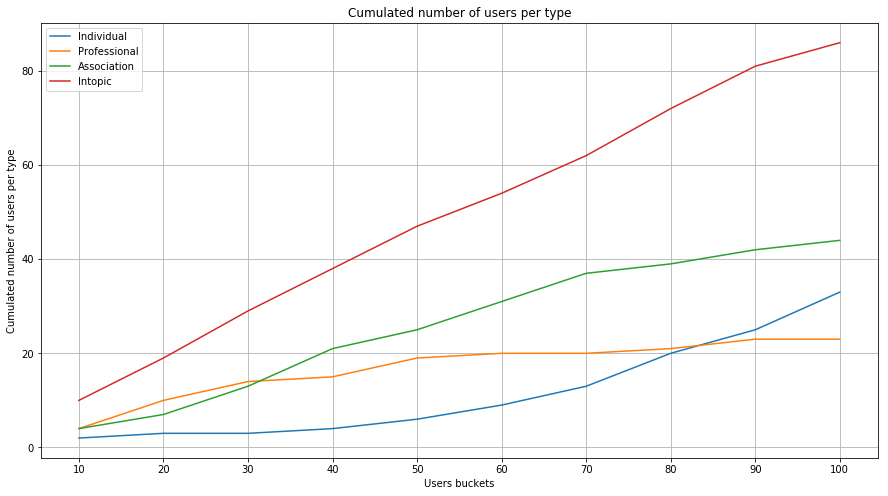

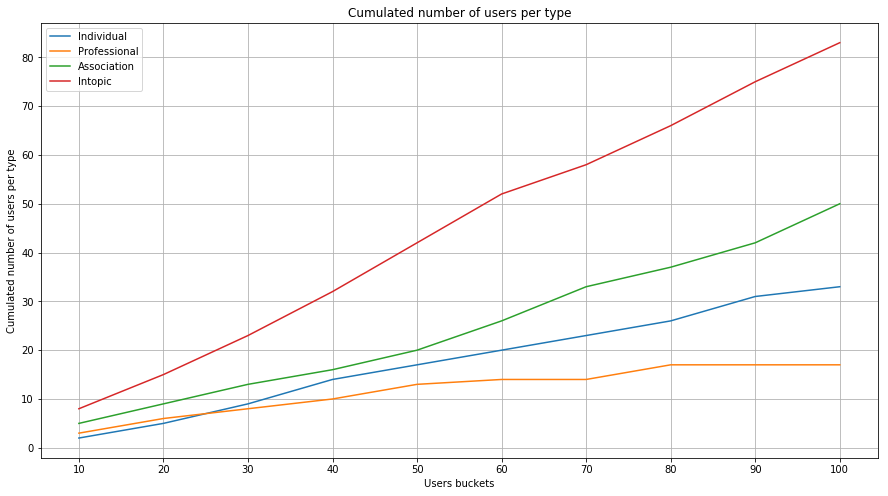

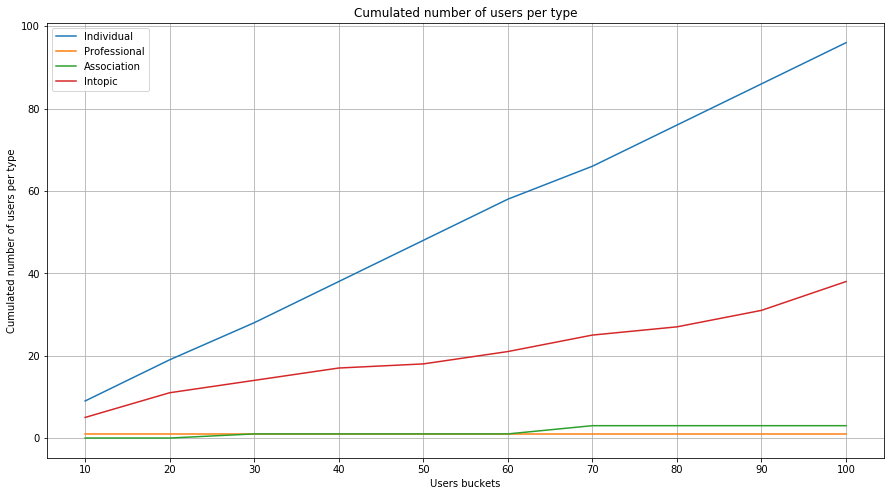

In [47]:
cum_sum_plot(get_single_rank(rankings, 1))
cum_sum_plot(get_single_rank(rankings, 2))
cum_sum_plot(get_single_rank(rankings, 3))

In [48]:
def stacked_bar_plot(rank):
    from functools import reduce
    
    fig, ax = plt.subplots(figsize=(15, 8))
    barWidth = 1
    bucket_size = 10    
    columns = rank.columns[1:-1].tolist()
    rank = rank.groupby(by=lambda x: int(x/bucket_size)).agg({
        '#': lambda x: x.iloc[-1], **{c: 'sum' for c in columns}})
    r = rank.index.tolist()
    
    for i, c in enumerate(columns):
        bottom = reduce((lambda x, y: x + y), [rank[c] for c in columns[0:i]], 0)
        plt.bar(r, rank[c], bottom=bottom, edgecolor='white', width=barWidth)
        
    plt.legend(columns)
    plt.xticks(rank.index.tolist(), [i * bucket_size for i in range(1, len(rank.index)+1)])
    plt.xlabel('Number of users')
    plt.ylabel('Number of users per type')
    plt.title('Distribution of users type over top 100 for Rank')
    plt.show()

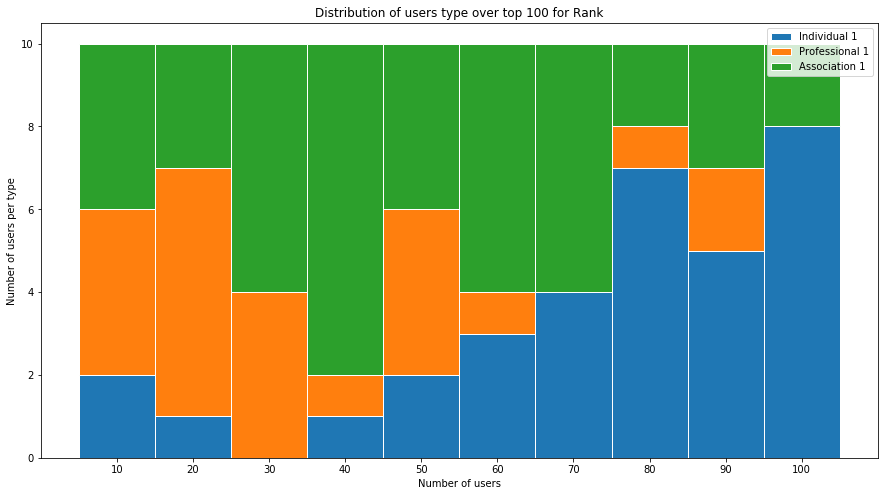

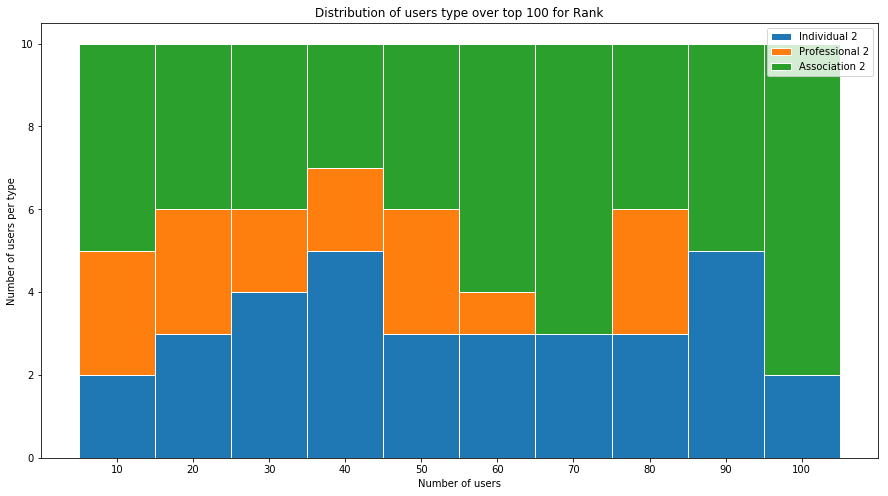

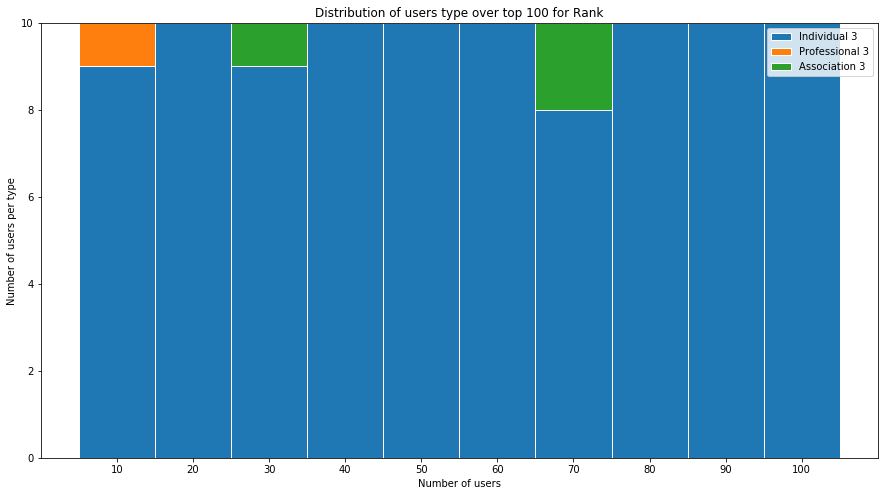

In [49]:
stacked_bar_plot(get_single_rank(rankings, 1))
stacked_bar_plot(get_single_rank(rankings, 2))
stacked_bar_plot(get_single_rank(rankings, 3))

In [56]:
plt.figure(figsize=(8,6))
barWidth = 1
r = rank_2.index.tolist()

print(rank_2)

plt.bar(r, rank_2['Individual 2'], edgecolor='white', width=barWidth)
plt.bar(r, rank_2['Professional 2'], bottom=rank_2['Individual 2'], edgecolor='white', width=barWidth)
plt.bar(r, rank_2['Association 2'], bottom=rank_2['Individual 2']+rank_2['Professional 2'], edgecolor='white', width=barWidth)

plt.legend(['Individual', 'Professional', 'Association'])
plt.xticks(rank_2.index.tolist(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.yticks(list(range(0,11)))
plt.xlabel('Number of users')
plt.ylabel('Number of users per type')
plt.title('Distribution of users type over top 100 for Rank 2')

plt.savefig("rank2-distribution.pdf", bbox_inches='tight')
plt.show()

             Rank 2
0       lexieisfree
1       jo_millar27
2         topisue56
3        socialissp
4          barryoor
5         whiteribb
6          jacksju1
7   ringinglowarrow
8   creditonchamber
9         mugabojda
10     sheroesforum
11    globalws_nuig
12     childfundpib
13   headlightorguk
14   colesmillerllp
15        pcsdrag0n
16  litterboxcomics
17        theoaks28
18       femsocnuig
19           njchuk
20  eddiestobartcom
21   lynseyjfenners
22      safer_lives
23           awpnhs
24           lav__k
25          galopuk
26       dawnie3011
27   womensaidabcln
28            dvrcv
29         doyna_sn
..              ...
70   _lindsaymillar
71       notaevents
72        rdash_nhs
73   rapecrisisscot
74       kavanaghmm
75    hiscbrentwood
76      roizalfonso
77    neegurapmusic
78  in_pjsdwnstairs
79     jk_janetkaye
80       planglobal
81     careinrwanda
82      csscritcare
83      awava_women
84       caronadune
85         saraloal
86           evawuk
87        dogstrust


KeyError: 'Individual 2'

<Figure size 576x432 with 0 Axes>

In [51]:
plt.figure(figsize=(8,6))
barWidth = 1
r = rank_3.index.tolist()

plt.bar(r, rank_3['Individual 3'], edgecolor='white', width=barWidth)
plt.bar(r, rank_3['Professional 3'], bottom=rank_3['Individual 3'], edgecolor='white', width=barWidth)
plt.bar(r, rank_3['Association 3'], bottom=rank_3['Individual 3']+rank_3['Professional 3'], edgecolor='white', width=barWidth)
# plt.plot(rank_3['Intopic 3'], color='red')

plt.legend(['Individual', 'Professional', 'Association'])
plt.xticks(rank_3.index.tolist(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Number of users')
plt.ylabel('Number of users per type')
plt.title('Distribution of users type over top 100 for Rank 3')

plt.savefig("rank3-distribution.pdf", bbox_inches='tight')
plt.show()

KeyError: 'Individual 3'

<Figure size 576x432 with 0 Axes>

In [52]:
def grouped_bar_plot(rank):
    from functools import reduce
    
    fig, ax = plt.subplots(figsize=(15, 8))
    barWidth = 0.25
    bucket_size = 10    
    columns = rank.columns[1:-1].tolist()
    rank = rank.groupby(by=lambda x: int(x/bucket_size)).agg({
        '#': lambda x: x.iloc[-1], **{c: 'sum' for c in columns}})
    r = rank.index.tolist()
    
#     for i, c in enumerate(columns):
#         bottom = reduce((lambda x, y: x + y), [rank[c] for c in columns[0:i]], 0)
#         plt.bar(r, rank[c], bottom=bottom, edgecolor='white', width=barWidth)

    for i, c in enumerate(columns):
        
        
    plt.legend(columns)
    plt.xticks(rank.index.tolist(), [i * bucket_size for i in range(1, len(rank.index)+1)])
    plt.xlabel('Number of users')
    plt.ylabel('Number of users per type')
    plt.title('Distribution of users type over top 100 for Rank')
    plt.show()

IndentationError: expected an indented block (<ipython-input-52-b63569dfbbb3>, line 19)

In [53]:
plt.figure(figsize=(15,8))

import numpy as np
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = rank_1['Individual 1']
bars2 = rank_1['Professional 1']
bars3 = rank_1['Association 1']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Individual')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Professional')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='Association')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks(rank_1.index.tolist(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
 
# Create legend & Show graphic
plt.legend();

KeyError: 'Individual 1'

<Figure size 1080x576 with 0 Axes>

In [54]:
plt.figure(figsize=(15,8))

import numpy as np
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = rank_2['Individual 2']
bars2 = rank_2['Professional 2']
bars3 = rank_2['Association 2']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Individual')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Professional')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='Association')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks(rank_1.index.tolist(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
 
# Create legend & Show graphic
plt.legend();

KeyError: 'Individual 2'

<Figure size 1080x576 with 0 Axes>